In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
def create_database():
    # Connect to an in-memory SQLite database
    conn = sqlite3.connect(':memory:')
    conn.execute('''
        CREATE TABLE sales (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            date TEXT,
            product TEXT,
            sales INTEGER
        )
    ''')
    
    # Sample data: (date, product, sales)
    data = [
        ('2023-01-01', 'Product A', 100),
        ('2023-01-02', 'Product B', 150),
        ('2023-01-03', 'Product A', 200),
        ('2023-01-04', 'Product B', 170),
        ('2023-01-05', 'Product A', 130),
        ('2023-01-06', 'Product B', 160)
    ]
    
    conn.executemany('INSERT INTO sales (date, product, sales) VALUES (?, ?, ?)', data)
    conn.commit()
    return conn

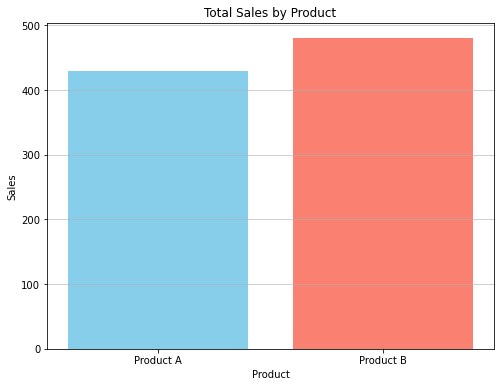

In [3]:
def load_and_process_data(conn):
    # Query data using SQL and load into a pandas DataFrame
    df = pd.read_sql_query("SELECT date, product, sales FROM sales", conn)
    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])
    return df

def plot_data(df):
    # Group data by product and sum sales
    product_sales = df.groupby('product')['sales'].sum().reset_index()
    
    # Plot a bar chart of total sales by product
    plt.figure(figsize=(8, 6))
    plt.bar(product_sales['product'], product_sales['sales'], color=['skyblue', 'salmon'])
    plt.title('Total Sales by Product')
    plt.xlabel('Product')
    plt.ylabel('Sales')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

def main():
    conn = create_database()
    df = load_and_process_data(conn)
    plot_data(df)
    conn.close()

if __name__ == '__main__':
    main()